In [253]:
import pandas as pd
import numpy as np
import csv as csv
from matplotlib import pyplot as plt


%pylab inline
dataset ="movies_data.csv" #Change this to where the file is stored 
datasetscrape = "scrapeddata2005.csv"
movie_data = pd.read_csv(dataset)
scraped_data = pd.read_csv(datasetscrape)

Populating the interactive namespace from numpy and matplotlib


In [254]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RidgeCV

%matplotlib inline

In [255]:
movie_data2 = movie_data[(movie_data['year'] >= 1980) & (movie_data['year'] <= 2005)]

In [256]:
#Make data match other dataset
def clean_title(title):
    if title.endswith(", The"):
        title = "The " + title[-5]
    return title
        
movie_data2["title"] = movie_data2['title'].map(clean_title)

/Users/williamsanders/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [257]:
movie_data2[movie_data2['title'].str.contains(", The")]

,Unnamed: 0,title,year,length,budget,rating,votes,r1,r2,r3,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
51801,51802,"This World, Then the Fireworks",1997,100,NaN,4.6,340,4.5,4.5,4.5,...,4.5,14.5,R,0,0,0,1,0,0,0
56720,56721,"Where There's Smoke, There's Fire",1987,89,NaN,3.8,5,64.5,0.0,0.0,...,0.0,0.0,NaN,0,0,0,0,0,0,0


In [258]:
movie_data.votes.head(10)

0    348
1     20
2      5
3      6
4     17
5     45
6    200
7     24
8     18
9     51
Name: votes, dtype: int64

### Joining Data Sets

In [259]:
movie_data3 = movie_data2
scraped_data3 = scraped_data
scraped_data3 = scraped_data3.rename(columns={'movie title':'title','runtime (mins)':'length','rating':'mpaa', 'release year':'year'})
# scraped_data3 = scraped_data3.rename(columns={'runtime (mins)':'length'})

In [260]:
scraped_data3.shape

(6691, 10)

In [261]:
scraped_data3.columns

Index([u'Unnamed: 0', u'distributor', u'domestic total gross',
       u'foreign total gross', u'title', u'opening weekend gross', u'mpaa',
       u'year', u'length', u'worldwide total gross'],
      dtype='object')

In [262]:
movie_data3.shape

(31484, 25)

In [263]:
movie_data3.columns

Index([u'Unnamed: 0', u'title', u'year', u'length', u'budget', u'rating',
       u'votes', u'r1', u'r2', u'r3', u'r4', u'r5', u'r6', u'r7', u'r8', u'r9',
       u'r10', u'mpaa', u'Action', u'Animation', u'Comedy', u'Drama',
       u'Documentary', u'Romance', u'Short'],
      dtype='object')

In [264]:
# result = pd.merge(movie_data3, scraped_data3, how='out', on=['title', 'year'])

In [265]:
combined_data = pd.merge(movie_data3, scraped_data3, left_on="title", right_on="title", how="outer")

In [266]:
combined_data.shape

(34090, 34)

In [267]:
combined_data.tail(100)

,Unnamed: 0_x,title,year_x,length_x,budget,rating,votes,r1,r2,r3,...,Short,Unnamed: 0_y,distributor,domestic total gross,foreign total gross,opening weekend gross,mpaa_y,year_y,length_y,worldwide total gross
33990,NaN,The Delicate Art of Parking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6487.0,Cinema Libre,213008.0,NaN,15859.0,Unrated,2004.0,87.0,NaN
33991,NaN,Deserted Station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6489.0,First Run,74791.0,NaN,841.0,Unrated,2004.0,88.0,NaN
33992,NaN,DIG!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6492.0,Palm,127067.0,NaN,20437.0,R,2004.0,109.0,NaN
33993,NaN,A Dirty Shame,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6494.0,Fine Line,1339668.0,574498.0,29384.0,NC-17,2004.0,88.0,1914166.0
33994,NaN,Distant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6495.0,New Yorker,96293.0,219112.0,11280.0,Unrated,2004.0,110.0,315405.0
33995,NaN,DodgeBall: A True Underdog Story,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6497.0,Fox,114326736.0,53395574.0,30070196.0,PG-13,2004.0,97.0,167722310.0
33996,NaN,Donnie Darko: The Director's Cut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6500.0,Newmarket,1270522.0,319627.0,24728.0,R,2004.0,133.0,1590149.0
33997,NaN,The Door in the Floor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6501.0,Focus Features,3854624.0,2860443.0,456876.0,R,2004.0,111.0,6715067.0
33998,NaN,The Dreamers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6502.0,Fox Searchlight,2532228.0,12588937.0,142632.0,NC-17,2004.0,116.0,15121165.0
33999,NaN,The Dust Factory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6503.0,MGM,12311.0,NaN,8000.0,PG,2004.0,99.0,NaN


In [268]:
ratingNull = [combined_data['rating'] == NaN]

In [269]:
# Select the rows of df where age is not NaN and sex is not NaN
# df[df['age'].notnull() & df['sex'].notnull()]

ratingValue = (combined_data['rating'].notnull() & combined_data['domestic total gross'].notnull())

In [270]:
movie_data = combined_data[ratingValue]

In [271]:
movie_data.columns

Index([u'Unnamed: 0_x', u'title', u'year_x', u'length_x', u'budget', u'rating',
       u'votes', u'r1', u'r2', u'r3', u'r4', u'r5', u'r6', u'r7', u'r8', u'r9',
       u'r10', u'mpaa_x', u'Action', u'Animation', u'Comedy', u'Drama',
       u'Documentary', u'Romance', u'Short', u'Unnamed: 0_y', u'distributor',
       u'domestic total gross', u'foreign total gross',
       u'opening weekend gross', u'mpaa_y', u'year_y', u'length_y',
       u'worldwide total gross'],
      dtype='object')

In [272]:
del movie_data['year_y']
del movie_data['length_y']
del movie_data['Unnamed: 0_y']
del movie_data['Unnamed: 0_x']
# del movie_data['mpaa_y']
movie_data = movie_data.rename(columns={'domestic total gross':'domestic_total_gross','worldwide total gross':'worldwide_total_gross','opening weekend gross':'opening_weekend_gross','year_x':'year','length_x':'length','foreign total gross':'foreign_total_gross'})

In [273]:
movie_data.columns

Index([u'title', u'year', u'length', u'budget', u'rating', u'votes', u'r1',
       u'r2', u'r3', u'r4', u'r5', u'r6', u'r7', u'r8', u'r9', u'r10',
       u'mpaa_x', u'Action', u'Animation', u'Comedy', u'Drama', u'Documentary',
       u'Romance', u'Short', u'distributor', u'domestic_total_gross',
       u'foreign_total_gross', u'opening_weekend_gross', u'mpaa_y',
       u'worldwide_total_gross'],
      dtype='object')

In [274]:
movie_data.head(100) 

,title,year,length,budget,rating,votes,r1,r2,r3,r4,...,Drama,Documentary,Romance,Short,distributor,domestic_total_gross,foreign_total_gross,opening_weekend_gross,mpaa_y,worldwide_total_gross
21,"'Night, Mother",1986.0,96.0,NaN,6.8,364.0,4.5,4.5,4.5,4.5,...,1.0,0.0,0.0,0.0,Universal,441863.0,NaN,49164.0,PG-13,NaN
23,'R Xmas,2001.0,83.0,NaN,4.9,288.0,14.5,4.5,4.5,4.5,...,1.0,0.0,0.0,0.0,Pathfinder,850.0,NaN,850.0,R,850.0
24,'Round Midnight,1986.0,133.0,NaN,7.3,902.0,4.5,4.5,4.5,4.5,...,1.0,0.0,0.0,0.0,Warner Bros.,3272593.0,NaN,25384.0,R,NaN
3101,10 Things I Hate About You,1999.0,97.0,16000000.0,6.7,19095.0,4.5,4.5,4.5,4.5,...,0.0,0.0,1.0,0.0,Buena Vista,38178166.0,15300000.0,8330681.0,PG-13,53478166.0
3106,10 to Midnight,1983.0,101.0,NaN,5.4,530.0,4.5,4.5,4.5,14.5,...,0.0,0.0,0.0,0.0,MGM,7175592.0,NaN,3050225.0,R,NaN
3122,101 Dalmatians,1996.0,103.0,NaN,5.5,5028.0,4.5,4.5,4.5,14.5,...,0.0,0.0,0.0,0.0,Buena Vista,144880014.0,NaN,2389226.0,G,NaN
3123,101 Dalmatians,1996.0,103.0,NaN,5.5,5028.0,4.5,4.5,4.5,14.5,...,0.0,0.0,0.0,0.0,Buena Vista,144880014.0,NaN,10279044.0,G,NaN
3124,101 Dalmatians,1996.0,103.0,NaN,5.5,5028.0,4.5,4.5,4.5,14.5,...,0.0,0.0,0.0,0.0,Buena Vista,136189294.0,184500000.0,33504025.0,G,320689294.0
3129,102 Dalmatians,2000.0,100.0,85000000.0,4.7,1987.0,4.5,4.5,14.5,14.5,...,0.0,0.0,0.0,0.0,Buena Vista,66957026.0,116654745.0,19883351.0,G,183611771.0
3155,1492: Conquest of Paradise,1992.0,154.0,47000000.0,6.0,3379.0,4.5,4.5,4.5,4.5,...,1.0,0.0,0.0,0.0,Paramount,7191399.0,NaN,3002680.0,PG-13,NaN


In [275]:
movie_data.corr()

,year,length,budget,rating,votes,r1,r2,r3,r4,r5,...,Animation,Comedy,Drama,Documentary,Romance,Short,domestic_total_gross,foreign_total_gross,opening_weekend_gross,worldwide_total_gross
year,1.000000,-0.052979,0.275634,0.157048,0.106690,0.028698,-0.099617,-0.147280,-0.183501,-0.209137,...,0.035687,0.016433,0.053690,0.136202,0.087383,0.098966,0.048170,-0.138577,0.153616,-0.144288
length,-0.052979,1.000000,0.334645,0.170517,0.293131,-0.096760,-0.027878,-0.023554,-0.054459,-0.043347,...,-0.182727,-0.094990,0.311563,-0.127189,0.095960,-0.590991,0.155990,0.207501,0.107835,0.202956
budget,0.275634,0.334645,1.000000,0.024508,0.362015,-0.059031,-0.001107,-0.007268,0.028954,0.106827,...,0.178909,-0.074777,-0.080553,-0.093634,-0.027301,-0.077610,0.571978,0.544351,0.649806,0.567470
rating,0.157048,0.170517,0.024508,1.000000,0.334197,-0.583638,-0.475446,-0.506990,-0.548743,-0.476171,...,0.056963,-0.130858,0.260059,0.187746,0.041236,0.096142,0.157493,0.179338,0.023657,0.156841
votes,0.106690,0.293131,0.362015,0.334197,1.000000,-0.092523,-0.042732,-0.077131,-0.121462,-0.177873,...,0.029306,0.000501,0.029963,-0.083417,0.022689,-0.075139,0.633681,0.556751,0.459940,0.600411
r1,0.028698,-0.096760,-0.059031,-0.583638,-0.092523,1.000000,0.394945,0.254810,0.137335,-0.037928,...,-0.013610,0.026560,-0.134616,-0.037227,-0.023158,-0.004704,-0.080279,-0.093264,-0.044993,-0.092159
r2,-0.099617,-0.027878,-0.001107,-0.475446,-0.042732,0.394945,1.000000,0.378314,0.203533,0.049208,...,-0.038866,0.044495,-0.104457,-0.138933,-0.028843,-0.078733,-0.034674,-0.034825,-0.006480,-0.036882
r3,-0.147280,-0.023554,-0.007268,-0.506990,-0.077131,0.254810,0.378314,1.000000,0.425742,0.179409,...,-0.030134,0.051456,-0.161487,-0.136220,-0.052762,-0.113560,-0.054181,-0.058618,-0.004993,-0.047884
r4,-0.183501,-0.054459,0.028954,-0.548743,-0.121462,0.137335,0.203533,0.425742,1.000000,0.468765,...,-0.046109,0.097774,-0.182362,-0.142355,-0.039656,-0.114058,-0.050900,-0.096857,0.023949,-0.067359
r5,-0.209137,-0.043347,0.106827,-0.476171,-0.177873,-0.037928,0.049208,0.179409,0.468765,1.000000,...,-0.018305,0.116229,-0.147951,-0.174141,-0.007142,-0.093527,-0.025858,-0.076791,0.062638,-0.050631


In [276]:
movie_data.title.str.contains("The ,").value_counts()

False    4595
Name: title, dtype: int64

In [277]:
movie_data.columns

Index([u'title', u'year', u'length', u'budget', u'rating', u'votes', u'r1',
       u'r2', u'r3', u'r4', u'r5', u'r6', u'r7', u'r8', u'r9', u'r10',
       u'mpaa_x', u'Action', u'Animation', u'Comedy', u'Drama', u'Documentary',
       u'Romance', u'Short', u'distributor', u'domestic_total_gross',
       u'foreign_total_gross', u'opening_weekend_gross', u'mpaa_y',
       u'worldwide_total_gross'],
      dtype='object')

In [278]:
movie_data.rating.describe()

count    4595.000000
mean        5.861001
std         1.242273
min         1.000000
25%         5.100000
50%         6.000000
75%         6.800000
max         9.600000
Name: rating, dtype: float64

In [279]:
# movie_data.sort_values("votes", ascending=False).head(10)
# movie_data.distributor.value_counts().describe()

movie_data.sort_values("worldwide_total_gross", ascending=False).head(150)

,title,year,length,budget,rating,votes,r1,r2,r3,r4,...,Drama,Documentary,Romance,Short,distributor,domestic_total_gross,foreign_total_gross,opening_weekend_gross,mpaa_y,worldwide_total_gross
28441,Titanic,1997.0,194.0,200000000.0,6.9,90195.0,14.5,4.5,4.5,4.5,...,1.0,0.0,1.0,0.0,Paramount,658672302.0,1.528100e+09,28638131.0,PG-13,2.186772e+09
16185,Jurassic Park,1993.0,127.0,63000000.0,7.4,57473.0,4.5,4.5,4.5,4.5,...,0.0,0.0,0.0,0.0,Universal,402453882.0,6.267000e+08,47026828.0,PG-13,1.029154e+09
26834,Star Wars: Episode I - The Phantom Menace,1999.0,133.0,115000000.0,6.4,84488.0,4.5,4.5,4.5,4.5,...,0.0,0.0,0.0,0.0,Fox,474544677.0,5.525000e+08,64820970.0,PG,1.027045e+09
13839,Harry Potter and the Sorcerer's Stone,2001.0,152.0,130000000.0,7.2,46741.0,4.5,4.5,4.5,4.5,...,0.0,0.0,0.0,0.0,Warner Bros.,317575550.0,6.571798e+08,90294621.0,PG,9.747554e+08
11888,Finding Nemo,2003.0,100.0,94000000.0,8.3,41846.0,4.5,4.5,4.5,4.5,...,1.0,0.0,0.0,0.0,Buena Vista,380843261.0,5.594923e+08,70251710.0,G,9.403355e+08
13837,Harry Potter and the Chamber of Secrets,2002.0,152.0,100000000.0,7.3,38394.0,4.5,4.5,4.5,4.5,...,0.0,0.0,0.0,0.0,Warner Bros.,261988482.0,6.169912e+08,88357488.0,PG,8.789796e+08
26650,Spider-Man,2002.0,121.0,139000000.0,7.4,63228.0,4.5,4.5,4.5,4.5,...,0.0,0.0,0.0,0.0,Sony / Columbia,403706375.0,4.180022e+08,114844116.0,PG-13,8.217086e+08
15310,Independence Day,1994.0,20.0,NaN,6.1,232.0,4.5,4.5,4.5,4.5,...,0.0,0.0,0.0,1.0,Fox,306169268.0,5.112316e+08,50228264.0,PG-13,8.174009e+08
15311,Independence Day,1996.0,153.0,75000000.0,6.1,61831.0,4.5,4.5,4.5,4.5,...,0.0,0.0,0.0,0.0,Fox,306169268.0,5.112316e+08,50228264.0,PG-13,8.174009e+08
15309,Independence Day,1983.0,110.0,NaN,6.5,121.0,4.5,4.5,4.5,4.5,...,1.0,0.0,0.0,0.0,Fox,306169268.0,5.112316e+08,50228264.0,PG-13,8.174009e+08


## Cleaning up the Variables

In [280]:
movie_data['profit']= (movie_data.worldwide_total_gross-movie_data.budget)

In [281]:
movie_data['return_percentage'] = (movie_data.worldwide_total_gross / movie_data.budget)

In [282]:
def nps(row):
    #Total Votes including Passives
    promoters = (row["r9"] + row["r10"]) * row["votes"] / 100
    detractors = (row["r1"] + row["r2"] + row["r3"] + row["r4"] + row["r5"] + row["r6"])  / 100
#     passives = (row["r7"] + row["r8"]) 
    denom = row["votes"]
    return (promoters - detractors) / denom

In [283]:
movie_data["movie_nps"] = movie_data.apply(nps, axis=1) #Creating new column, movie_nps

In [284]:
movie_data.columns

Index([u'title', u'year', u'length', u'budget', u'rating', u'votes', u'r1',
       u'r2', u'r3', u'r4', u'r5', u'r6', u'r7', u'r8', u'r9', u'r10',
       u'mpaa_x', u'Action', u'Animation', u'Comedy', u'Drama', u'Documentary',
       u'Romance', u'Short', u'distributor', u'domestic_total_gross',
       u'foreign_total_gross', u'opening_weekend_gross', u'mpaa_y',
       u'worldwide_total_gross', u'profit', u'return_percentage',
       u'movie_nps'],
      dtype='object')

In [285]:
# del movie_data[['r1','r2','r3','r4','r5','r6','r7','r8','r9','r10']]
movie_data = movie_data.drop(movie_data.columns[[6,7,8,9,10,11,12,13,14,15,16]], axis=1)

In [286]:
movie_data.columns

Index([u'title', u'year', u'length', u'budget', u'rating', u'votes', u'Action',
       u'Animation', u'Comedy', u'Drama', u'Documentary', u'Romance', u'Short',
       u'distributor', u'domestic_total_gross', u'foreign_total_gross',
       u'opening_weekend_gross', u'mpaa_y', u'worldwide_total_gross',
       u'profit', u'return_percentage', u'movie_nps'],
      dtype='object')

## Votes Cleanup

In [287]:
# movie_data.sort_values("votes", ascending=False).head(100)
movie_data.votes.describe()

count      4595.000000
mean       4327.675734
std        9569.743328
min           5.000000
25%         238.500000
50%        1053.000000
75%        3995.500000
max      132745.000000
Name: votes, dtype: float64

In [288]:
movie_data['vote_counts'] = 0

In [289]:
#Make the vote amounts between 0 - 3, 3 means they are in highest voting cohort
mask = (movie_data['votes'] < 7500) & (movie_data['votes'] >= 3000)
mask2 = (movie_data['votes'] < 3000) & (movie_data['votes'] >= 500)
mask3 = (movie_data['votes'] < 500)

movie_data.loc[movie_data["votes"] > 7500, "vote_counts"] = 3
movie_data.loc[mask, "vote_counts"] = 2
movie_data.loc[mask2, "vote_counts"] = 1
movie_data.loc[mask3, "vote_counts"] = 0


In [290]:
movie_data.vote_counts.value_counts()

0    1692
1    1504
3     717
2     682
Name: vote_counts, dtype: int64

In [291]:
#Delete Votes Column
# del movie_data['votes']

In [292]:
movie_data.columns

Index([u'title', u'year', u'length', u'budget', u'rating', u'votes', u'Action',
       u'Animation', u'Comedy', u'Drama', u'Documentary', u'Romance', u'Short',
       u'distributor', u'domestic_total_gross', u'foreign_total_gross',
       u'opening_weekend_gross', u'mpaa_y', u'worldwide_total_gross',
       u'profit', u'return_percentage', u'movie_nps', u'vote_counts'],
      dtype='object')

# Budget

In [293]:
movie_data.budget.describe()

count    1.617000e+03
mean     2.769620e+07
std      2.923233e+07
min      0.000000e+00
25%               NaN
50%               NaN
75%               NaN
max      2.000000e+08
Name: budget, dtype: float64

In [294]:
movie_data.sort_values('budget', ascending=False).head(100)

,title,year,length,budget,rating,votes,Action,Animation,Comedy,Drama,...,distributor,domestic_total_gross,foreign_total_gross,opening_weekend_gross,mpaa_y,worldwide_total_gross,profit,return_percentage,movie_nps,vote_counts
28441,Titanic,1997.0,194.0,200000000.0,6.9,90195.0,0.0,0.0,0.0,1.0,...,Paramount,658672302.0,1.528100e+09,28638131.0,PG-13,2.186772e+09,1.986772e+09,10.933862,0.389996,3
30366,Waterworld,1995.0,176.0,175000000.0,5.4,19325.0,1.0,0.0,0.0,1.0,...,Universal,88246220.0,1.759720e+08,21171780.0,PG-13,2.642182e+08,8.921822e+07,1.509818,0.089971,3
27992,Terminator 3: Rise of the Machines,2003.0,109.0,175000000.0,6.9,32111.0,1.0,0.0,0.0,0.0,...,Warner Bros.,150371112.0,2.830000e+08,44041440.0,R,4.333711e+08,2.583711e+08,2.476406,0.189988,3
30735,Wild Wild West,1999.0,107.0,170000000.0,4.0,19078.0,1.0,0.0,1.0,0.0,...,Warner Bros.,113804681.0,1.083000e+08,27687484.0,PG-13,2.221047e+08,5.210468e+07,1.306498,0.089954,3
27814,Tarzan,1999.0,88.0,150000000.0,7.1,10672.0,0.0,1.0,0.0,0.0,...,Buena Vista,171091819.0,2.771000e+08,34221968.0,G,4.481918e+08,2.981918e+08,2.987945,0.289965,3
3898,Alexander,2004.0,175.0,150000000.0,5.5,11254.0,0.0,0.0,0.0,1.0,...,Warner Bros.,34297191.0,1.330010e+08,13687087.0,R,1.672982e+08,1.729819e+07,1.115321,0.189949,3
18853,Master and Commander: The Far Side of the World,2003.0,138.0,150000000.0,7.5,21328.0,1.0,0.0,0.0,1.0,...,Fox,93927920.0,1.180832e+08,25105990.0,PG-13,2.120111e+08,6.201111e+07,1.413407,0.289983,3
9821,Die Another Day,2002.0,133.0,142000000.0,6.4,22136.0,1.0,0.0,0.0,0.0,...,MGM,160942139.0,2.710290e+08,47072040.0,PG-13,4.319711e+08,2.899711e+08,3.042050,0.089979,3
19096,Men in Black II,2002.0,88.0,140000000.0,5.6,21580.0,1.0,0.0,1.0,0.0,...,Sony / Columbia,190418803.0,2.514000e+08,52148751.0,PG-13,4.418188e+08,3.018188e+08,3.155849,0.089969,3
17451,Lethal Weapon 4,1998.0,127.0,140000000.0,6.3,17758.0,1.0,0.0,1.0,0.0,...,Warner Bros.,130444603.0,1.550000e+08,34048124.0,R,2.854446e+08,1.454446e+08,2.038890,0.089974,3


In [295]:
# movie_data1.budget.value_counts().sum()

776

In [296]:
movie_data['budget_bin'] = 0
#Make the vote amounts between 0 - 3, 3 means they are in highest voting cohort
mask = (movie_data['budget'] < 75000000) & (movie_data['budget'] >= 40000000)
mask2 = (movie_data['budget'] < 40000000) & (movie_data['budget'] >= 20000000)
mask3 = (movie_data['budget'] < 20000000) & (movie_data['budget'] >= 8000000)
mask4 = (movie_data['budget'] < 8000000)

movie_data.loc[movie_data["budget"] >= 75000000, "budget_bin"] = 3
movie_data.loc[mask, "budget_bin"] = 2
movie_data.loc[mask2, "budget_bin"] = 1
movie_data.loc[mask3, "budget_bin"] = 0


## Worldwide Gross

In [356]:
movie_data['ww_gross_bin'] = 0
#Make the vote amounts between 0 - 3, 3 means they are in highest voting cohort
mask = (movie_data['worldwide_total_gross'] < 150000000) & (movie_data['worldwide_total_gross'] >= 50000000)
mask2 = (movie_data['worldwide_total_gross'] < 50000000) & (movie_data['worldwide_total_gross'] >= 15000000)
mask3 = (movie_data['worldwide_total_gross'] < 15000000) & (movie_data['worldwide_total_gross'] >= 3000000)
mask4 = (movie_data['worldwide_total_gross'] < 3000000)

movie_data.loc[movie_data["worldwide_total_gross"] >= 150000000, "ww_gross_bin"] = 4
movie_data.loc[mask, "ww_gross_bin"] = 3
movie_data.loc[mask2, "ww_gross_bin"] = 2
movie_data.loc[mask3, "ww_gross_bin"] = 1
movie_data.loc[mask4, "ww_gross_bin"] = 0

In [357]:
movie_data.ww_gross_bin.value_counts()

0    3472
3     353
4     290
2     287
1     193
Name: ww_gross_bin, dtype: int64

In [346]:
# movie_data.worldwide_total_gross.isnull().value_counts()

## Domestic Gross Bin

In [358]:
movie_data['domestic_gross_bin'] = 0
#Make the vote amounts between 0 - 3, 3 means they are in highest voting cohort
mask = (movie_data['domestic_total_gross'] < 150000000) & (movie_data['domestic_total_gross'] >= 50000000)
mask2 = (movie_data['domestic_total_gross'] < 50000000) & (movie_data['domestic_total_gross'] >= 15000000)
mask3 = (movie_data['domestic_total_gross'] < 15000000) & (movie_data['domestic_total_gross'] >= 5000000)
mask4 = (movie_data['domestic_total_gross'] < 5000000)

movie_data.loc[movie_data["worldwide_total_gross"] >= 200000000, "domestic_gross_bin"] = 4
movie_data.loc[mask, "domestic_gross_bin"] = 3
movie_data.loc[mask2, "domestic_gross_bin"] = 2
movie_data.loc[mask3, "domestic_gross_bin"] = 1
movie_data.loc[mask4, "domestic_gross_bin"] = 0

In [359]:
movie_data.domestic_gross_bin.value_counts()

0    2186
2    1000
1     830
3     489
4      90
Name: domestic_gross_bin, dtype: int64

In [342]:
movie_data.domestic_total_gross.isnull().value_counts()

False    4595
Name: domestic_total_gross, dtype: int64

## Foreign Gross

In [360]:
movie_data['foreign_gross_bin'] = 0
#Make the vote amounts between 0 - 3, 3 means they are in highest voting cohort
mask = (movie_data['foreign_total_gross'] < 150000000) & (movie_data['foreign_total_gross'] >= 50000000)
mask2 = (movie_data['foreign_total_gross'] < 50000000) & (movie_data['foreign_total_gross'] >= 15000000)
mask3 = (movie_data['foreign_total_gross'] < 15000000) & (movie_data['foreign_total_gross'] >= 3000000)
mask4 = (movie_data['foreign_total_gross'] < 3000000)

movie_data.loc[movie_data["foreign_total_gross"] >= 150000000, "foreign_gross_bin"] = 4
movie_data.loc[mask, "foreign_gross_bin"] = 3
movie_data.loc[mask2, "foreign_gross_bin"] = 2
movie_data.loc[mask3, "foreign_gross_bin"] = 1
movie_data.loc[mask4, "foreign_gross_bin"] = 0

In [362]:
movie_data.foreign_gross_bin.value_counts()

0    3690
3     270
1     261
2     253
4     121
Name: foreign_gross_bin, dtype: int64

## Opening Gross

In [364]:
movie_data['opening_gross_bin'] = 0
#Make the vote amounts between 0 - 3, 3 means they are in highest voting cohort
mask = (movie_data['opening_weekend_gross'] < 30000000) & (movie_data['opening_weekend_gross'] >= 20000000)
mask2 = (movie_data['opening_weekend_gross'] < 20000000) & (movie_data['opening_weekend_gross'] >= 10000000)
mask3 = (movie_data['opening_weekend_gross'] < 10000000) & (movie_data['opening_weekend_gross'] >= 3000000)
mask4 = (movie_data['opening_weekend_gross'] < 3000000)

movie_data.loc[movie_data["foreign_total_gross"] >= 30000000, "opening_gross_bin"] = 4
movie_data.loc[mask, "opening_gross_bin"] = 3
movie_data.loc[mask2, "opening_gross_bin"] = 2
movie_data.loc[mask3, "opening_gross_bin"] = 1
movie_data.loc[mask4, "opening_gross_bin"] = 0

In [365]:
movie_data.opening_gross_bin.value_counts()

0    2942
1    1049
2     400
3     106
4      98
Name: opening_gross_bin, dtype: int64

### Distributors

In [298]:
# df = pd.DataFrame({'a':list('abssbab')})
movie_data.groupby('distributor').count()
# movie_data['distributor'].value_counts()
movie_data['distributor_freq'] = movie_data.groupby('distributor')['distributor'].transform('count')
# movie_data.head(100)

,title,year,length,budget,rating,votes,Action,Animation,Comedy,Drama,...,foreign_total_gross,opening_weekend_gross,mpaa_y,worldwide_total_gross,profit,return_percentage,movie_nps,vote_counts,budget_bin,distributor_freq
21,"'Night, Mother",1986.0,96.0,NaN,6.8,364.0,0.0,0.0,0.0,1.0,...,NaN,49164.0,PG-13,NaN,NaN,NaN,0.389258,0,0,310
23,'R Xmas,2001.0,83.0,NaN,4.9,288.0,0.0,0.0,0.0,1.0,...,NaN,850.0,R,850.0,NaN,NaN,0.087674,0,0,5
24,'Round Midnight,1986.0,133.0,NaN,7.3,902.0,0.0,0.0,0.0,1.0,...,NaN,25384.0,R,NaN,NaN,NaN,0.389590,1,0,428
3101,10 Things I Hate About You,1999.0,97.0,16000000.0,6.7,19095.0,0.0,0.0,1.0,0.0,...,15300000.0,8330681.0,PG-13,53478166.0,37478166.0,3.342385,0.289981,3,0,311
3106,10 to Midnight,1983.0,101.0,NaN,5.4,530.0,1.0,0.0,0.0,0.0,...,NaN,3050225.0,R,NaN,NaN,NaN,0.088925,1,0,246
3122,101 Dalmatians,1996.0,103.0,NaN,5.5,5028.0,0.0,0.0,1.0,0.0,...,NaN,2389226.0,G,NaN,NaN,NaN,0.089867,2,0,311
3123,101 Dalmatians,1996.0,103.0,NaN,5.5,5028.0,0.0,0.0,1.0,0.0,...,NaN,10279044.0,G,NaN,NaN,NaN,0.089867,2,0,311
3124,101 Dalmatians,1996.0,103.0,NaN,5.5,5028.0,0.0,0.0,1.0,0.0,...,184500000.0,33504025.0,G,320689294.0,NaN,NaN,0.089867,2,0,311
3129,102 Dalmatians,2000.0,100.0,85000000.0,4.7,1987.0,0.0,0.0,1.0,0.0,...,116654745.0,19883351.0,G,183611771.0,98611771.0,2.160138,0.089612,1,3,311
3155,1492: Conquest of Paradise,1992.0,154.0,47000000.0,6.0,3379.0,0.0,0.0,0.0,1.0,...,NaN,3002680.0,PG-13,NaN,NaN,NaN,0.089831,2,2,283


In [312]:
# movie_data['distrib2'] = movie_data.distributor

In [313]:
# movie_data.distributor.value_counts()

In [314]:
movie_data['distributor_bin'] = 0
#Make the vote amounts between 0 - 3, 3 means they are in highest voting cohort
mask = (movie_data['distributor_freq'] < 145) & (movie_data['distributor_freq'] >= 20)
mask2 = (movie_data['distributor_freq'] < 75) & (movie_data['distributor_freq'] >= 20)
mask3 = (movie_data['distributor_freq'] < 20) & (movie_data['distributor_freq'] >= 10)
mask4 = (movie_data['distributor_freq'] < 10)

movie_data.loc[movie_data["distributor_freq"] >= 145, "distributor_bin"] = 4
movie_data.loc[mask, "distributor_bin"] = 3
movie_data.loc[mask2, "distributor_bin"] = 2
movie_data.loc[mask3, "distributor_bin"] = 1
movie_data.loc[mask4, "distributor_bin"] = 0

In [315]:
movie_data.distributor_bin.value_counts()

4    2570
2     768
0     554
1     405
3     298
Name: distributor_bin, dtype: int64

In [318]:
# movie_data.sort_values("votes", ascending=False).head(10)
# movie_data.distributor.value_counts().describe()

movie_data.sort_values("worldwide_total_gross", ascending=False).head(150)

,title,year,length,budget,rating,votes,Action,Animation,Comedy,Drama,...,mpaa_y,worldwide_total_gross,profit,return_percentage,movie_nps,vote_counts,budget_bin,distributor_freq,distributor_bin,distrib2
28441,Titanic,1997.0,194.0,200000000.0,6.9,90195.0,0.0,0.0,0.0,1.0,...,PG-13,2.186772e+09,1.986772e+09,10.933862,0.389996,3,3,283,4,Paramount
16185,Jurassic Park,1993.0,127.0,63000000.0,7.4,57473.0,1.0,0.0,0.0,0.0,...,PG-13,1.029154e+09,9.661539e+08,16.335776,0.289994,3,2,310,4,Universal
26834,Star Wars: Episode I - The Phantom Menace,1999.0,133.0,115000000.0,6.4,84488.0,1.0,0.0,0.0,0.0,...,PG,1.027045e+09,9.120447e+08,8.930823,0.189996,3,3,279,4,Fox
13839,Harry Potter and the Sorcerer's Stone,2001.0,152.0,130000000.0,7.2,46741.0,0.0,0.0,0.0,0.0,...,PG,9.747554e+08,8.447554e+08,7.498118,0.289992,3,3,428,4,Warner Bros.
11888,Finding Nemo,2003.0,100.0,94000000.0,8.3,41846.0,0.0,1.0,1.0,1.0,...,G,9.403355e+08,8.463355e+08,10.003570,0.489994,3,3,311,4,Buena Vista
13837,Harry Potter and the Chamber of Secrets,2002.0,152.0,100000000.0,7.3,38394.0,0.0,0.0,0.0,0.0,...,PG,8.789796e+08,7.789796e+08,8.789796,0.289990,3,3,428,4,Warner Bros.
26650,Spider-Man,2002.0,121.0,139000000.0,7.4,63228.0,1.0,0.0,0.0,0.0,...,PG-13,8.217086e+08,6.827086e+08,5.911572,0.289994,3,3,186,4,Sony / Columbia
15310,Independence Day,1994.0,20.0,NaN,6.1,232.0,0.0,0.0,0.0,0.0,...,PG-13,8.174009e+08,NaN,NaN,0.087974,0,0,279,4,Fox
15311,Independence Day,1996.0,153.0,75000000.0,6.1,61831.0,1.0,0.0,0.0,0.0,...,PG-13,8.174009e+08,7.424009e+08,10.898679,0.089992,3,3,279,4,Fox
15309,Independence Day,1983.0,110.0,NaN,6.5,121.0,0.0,0.0,0.0,1.0,...,PG-13,8.174009e+08,NaN,NaN,0.186942,0,0,279,4,Fox


In [90]:
# titanic_test = pandas.read_csv("titanic_test.csv")
# big_distributor = movie_data.loc[movie_data['distributor'] > 75
# movie_data["big_distributor"] = movie_data["Age"].fillna(titanic["Age"].median())


# titanic_test["Fare"] = titanic_test["Fare"].fillna(titanic_test["Fare"].median())
# titanic_test.loc[titanic_test["Sex"] == "male", "Sex"] = 0 
# titanic_test.loc[titanic_test["Sex"] == "female", "Sex"] = 1
# titanic_test["Embarked"] = titanic_test["Embarked"].fillna("S")

# titanic_test.loc[titanic_test["Embarked"] == "S", "Embarked"] = 0
# titanic_test.loc[titanic_test["Embarked"] == "C", "Embarked"] = 1
# titanic_test.loc[titanic_test["Embarked"] == "Q", "Embarked"] = 2

In [ ]:
movie_data1 = movie_data.dropna()

## End Trying STuff

(0, 10)

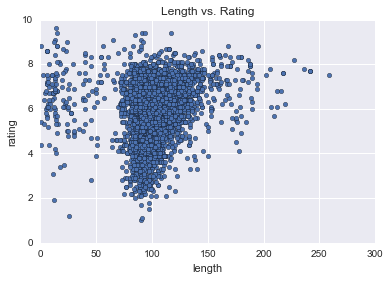

In [91]:
x = movie_data['length']
y = movie_data['rating']
ax = movie_data.plot.scatter(x = "length", y = "rating", title = "Length vs. Rating")
ax.set_xlim(0,300)
ax.set_ylim(0,10)

In [97]:
movie_data.votes.describe()

count      4595.000000
mean       4327.675734
std        9569.743328
min           5.000000
25%         238.500000
50%        1053.000000
75%        3995.500000
max      132745.000000
Name: votes, dtype: float64

(0, 10)

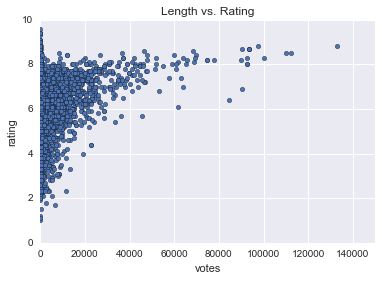

In [103]:
x = movie_data['vote']
y = movie_data['rating']
ax = movie_data.plot.scatter(x = "votes", y = "rating", title = "Length vs. Rating")
ax.set_xlim(0,150000)
ax.set_ylim(0,10)

In [93]:
movie_data.length.max()

360.0

In [ ]:
movie_data.sort_values("length", ascending=False).head(1).title

## Let's find the NPS

In [435]:
movie_data.movie_nps.describe()

count    4595.000000
mean        0.205109
std         0.141883
min        -0.227000
25%         0.089728
50%         0.187397
75%         0.289734
max         0.942000
Name: movie_nps, dtype: float64

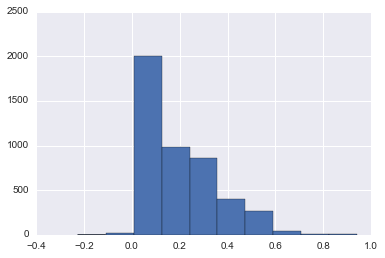

In [438]:
movie_data.movie_nps.hist()

The histogram of NPS scores looks pretty good, we see that there are a lot of movies around a 0 NPS score.

## Let's check out some OLS Regression Results with NPS

In [366]:
movie_data1 = movie_data.dropna()

In [397]:
movie_data1.columns

Index([u'title', u'year', u'length', u'budget', u'rating', u'votes', u'Action',
       u'Animation', u'Comedy', u'Drama', u'Documentary', u'Romance', u'Short',
       u'distributor', u'domestic_total_gross', u'foreign_total_gross',
       u'opening_weekend_gross', u'mpaa_y', u'worldwide_total_gross',
       u'profit', u'return_percentage', u'movie_nps', u'vote_counts',
       u'budget_bin', u'distributor_freq', u'distributor_bin', u'distrib2',
       u'ww_gross_bin', u'domestic_gross_bin', u'foreign_gross_bin',
       u'opening_gross_bin'],
      dtype='object')

In [434]:
#This has rating in the regression

lsm = smf.ols('profit ~  votes   + budget_bin + year + length  + Romance + Action  + mpaa_y + distributor_bin  + opening_gross_bin ', data = movie_data1)
fit1 = lsm.fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     83.34
Date:                Thu, 06 Oct 2016   Prob (F-statistic):          7.14e-130
Time:                        23:59:47   Log-Likelihood:                -15380.
No. Observations:                 776   AIC:                         3.079e+04
Df Residuals:                     763   BIC:                         3.085e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept          1.093e+10   1.78e+0

In [ ]:
predictors = ['votes','Comedy','Drama','Documentary + budget_bin + year + length + Animation + Romance + Action  + mpaa_y + distributor_bin  + opening_gross_bin '

In [388]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

In [389]:
predictors = ['year','length','budget','rating','votes','Action',
       'Animation', 'Comedy', 'Drama', 'Documentary', 'Romance', 'Short', 'domestic_total_gross', 'foreign_total_gross',
       'opening_weekend_gross',  'worldwide_total_gross',
       'movie_nps','vote_counts','budget_bin','distributor_bin',
       'ww_gross_bin', 'domestic_gross_bin', 'foreign_gross_bin',
       'opening_gross_bin']

In [390]:
movie_data.dtypes

title                     object
year                     float64
length                   float64
budget                   float64
rating                   float64
votes                    float64
Action                   float64
Animation                float64
Comedy                   float64
Drama                    float64
Documentary              float64
Romance                  float64
Short                    float64
distributor               object
domestic_total_gross     float64
foreign_total_gross      float64
opening_weekend_gross    float64
mpaa_y                    object
worldwide_total_gross    float64
profit                   float64
return_percentage        float64
movie_nps                float64
vote_counts                int64
budget_bin                 int64
distributor_freq           int64
distributor_bin            int64
distrib2                  object
ww_gross_bin               int64
domestic_gross_bin         int64
foreign_gross_bin          int64
opening_gr

In [393]:
selector = SelectKBest(f_classif, k=5)
selector.fit(movie_data1[predictors], movie_data1["movie_nps"])
# scores = (selector.pvalues_)

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
# plt.bar(range(len(predictors)), scores)
# plt.xticks(range(len(predictors)), predictors, rotation='vertical')
# plt.show()

# Pick only the four best features.
# predictors = ["Pclass", "Sex", "Fare", "Title"]

alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=8, min_samples_leaf=4)
kf = cross_validation.KFold(movie_data1.shape[0], n_folds=3, random_state=1)

scores = cross_validation.cross_val_score(alg, movie_data1[predictors], movie_data1["movie_nps"], cv=kf)

print(scores.mean())

ValueError: Unknown label type: 'continuous'

In [392]:
# cols= ['year', 'length', 'budget','Action','Drama','Documentary','Romance','foreign_total_gross','opening_weekend_gross','worldwide_total_gross', 'domestic_total_gross']

In [ ]:
movie_data1 = movie_data.dropna()

In [ ]:
movie_data1.head()

In [ ]:
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min

In [ ]:
listed = []
# for i in xrange(20):
X = movie_data1[cols]
y = movie_data1['movie_nps']
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3)
linear = linearR(X_train, X_test, y_train, y_test)
ridge = ridgeCVs(X_train, X_test, y_train, y_test)
#     lineartrain = linear_train(X_train, X_test, y_train, y_test)
# linear,ridge))
listed

plt.plot(linear, y_test)


In [ ]:
linear.coef_

In [ ]:
y_test

In [ ]:
# def linearR(X_train, X_test, y_train, y_test):
lr = LinearRegression()
lr.fit(X_train, y_train)
X_test
Ynew = lr.predict(X_test) #predict y 

#     return lr.score(X_test, y_test)
# y_test
plt.scatter(Ynew, y_test)
plt.xlim(0,0.4)
plt.ylim(0,0.4)




    

In [ ]:
lr.coef_

In [ ]:
np.corrcoef(Ynew,y_test)

In [ ]:
type(y_test)

In [ ]:
linear

In [ ]:
def ridgeCVs(X_train, X_test, y_train, y_test):
    rcv = RidgeCV(cv=10)
    rcv.fit(X,y)
    return rcv.score(X_test, y_test)


In [ ]:
def linear_train(X_train, X_test, y_train, y_test):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    return lr.score(X_test, y_test)

In [ ]:
# from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [ ]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X, y)
rf.feature_importances_

In [ ]:
sorted(zip(rf.feature_importances_, cols),reverse=True)

## What movies lost the most money?

/Users/williamsanders/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/williamsanders/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


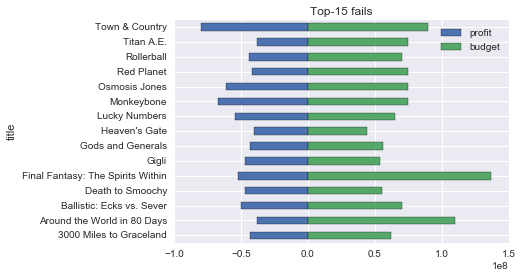

In [427]:
#Non standardized

# movie_data['profit']= (movie_data.worldwide_total_gross-movie_data.budget)
movie_data.profit.head(10)
top10fails  = movie_data.sort(columns='profit').head(15); 
top10hits = movie_data.sort(columns='profit', ascending = False).head(15); 
top10fails[['profit', 'budget']].groupby(movie_data['title']).sum().plot.barh(stacked=True, title='Top-15 fails')

/Users/williamsanders/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


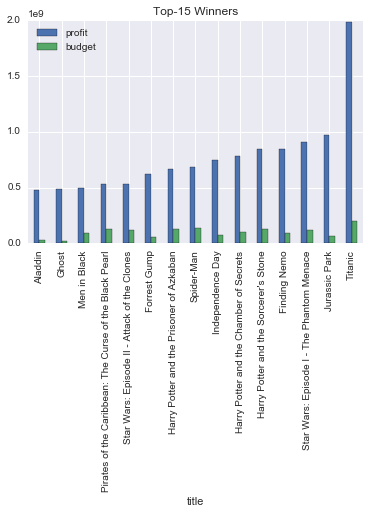

In [431]:
top10hits[['profit', 'budget']].groupby(movie_data['title']).sum().sort(columns='profit',ascending=True).plot.bar(stacked=False, title='Top-15 Winners')

In [426]:
top10hits

,title,year,length,budget,rating,votes,Action,Animation,Comedy,Drama,...,movie_nps,vote_counts,budget_bin,distributor_freq,distributor_bin,distrib2,ww_gross_bin,domestic_gross_bin,foreign_gross_bin,opening_gross_bin
28441,Titanic,1997.0,194.0,200000000.0,6.9,90195.0,0.0,0.0,0.0,1.0,...,0.389996,3,3,283,4,Paramount,4,4,4,3
16185,Jurassic Park,1993.0,127.0,63000000.0,7.4,57473.0,1.0,0.0,0.0,0.0,...,0.289994,3,2,310,4,Universal,4,4,4,4
26834,Star Wars: Episode I - The Phantom Menace,1999.0,133.0,115000000.0,6.4,84488.0,1.0,0.0,0.0,0.0,...,0.189996,3,3,279,4,Fox,4,4,4,4
11888,Finding Nemo,2003.0,100.0,94000000.0,8.3,41846.0,0.0,1.0,1.0,1.0,...,0.489994,3,3,311,4,Buena Vista,4,4,4,4
13839,Harry Potter and the Sorcerer's Stone,2001.0,152.0,130000000.0,7.2,46741.0,0.0,0.0,0.0,0.0,...,0.289992,3,3,428,4,Warner Bros.,4,4,4,4
13837,Harry Potter and the Chamber of Secrets,2002.0,152.0,100000000.0,7.3,38394.0,0.0,0.0,0.0,0.0,...,0.289990,3,3,428,4,Warner Bros.,4,4,4,4
15311,Independence Day,1996.0,153.0,75000000.0,6.1,61831.0,1.0,0.0,0.0,0.0,...,0.089992,3,3,279,4,Fox,4,4,4,4
26650,Spider-Man,2002.0,121.0,139000000.0,7.4,63228.0,1.0,0.0,0.0,0.0,...,0.289994,3,3,186,4,Sony / Columbia,4,4,4,4
13838,Harry Potter and the Prisoner of Azkaban,2004.0,141.0,130000000.0,7.8,24973.0,0.0,0.0,0.0,0.0,...,0.389989,3,3,428,4,Warner Bros.,4,4,4,4
12239,Forrest Gump,1994.0,142.0,55000000.0,8.2,89722.0,0.0,0.0,1.0,1.0,...,0.589997,3,2,283,4,Paramount,4,4,4,3


In [416]:
# top10fails['profit1'] = top10fails.profit

<function matplotlib.pyplot.show>

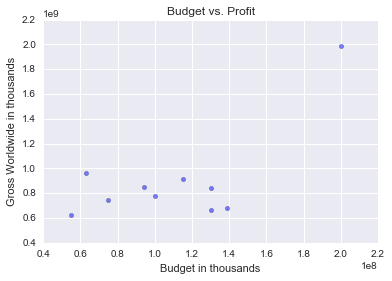

In [421]:
x = top10hits.budget
y = top10hits.profit
title('Budget vs. Profit')
xlabel('Budget in thousands')
ylabel('Gross Worldwide in thousands')
plt.scatter(x,y, alpha = 0.5)
# plt.xlim(0,200000000)
# plt.ylim(0,2000000000)

plt.show

In [ ]:
# movie_data['standardized_gross'] = movie_data['worldwide_total_gross']/100000
# movie_data['standardized_budget'] = movie_data['budget']/100000

# top10hits[['standardized_budget', 'standardized_gross']].groupby(movie_data['title']).sum().plot.barh(stacked=True, title='Top-15 success')

## Most profitable distributor

Could also calculate the best returns on investment
Budget (Invested Capital)
Gross (Total Return)

Take total return / invested capital to find return

In [ ]:
movie_data['return_percentage'] = (movie_data.worldwide_total_gross / movie_data.budget)

In [ ]:
movie_data.head(10)

In [ ]:
top30returns = movie_data.sort(columns='return_percentage', ascending = False)[7:32]; 
top30returns[['budget', 'worldwide_total_gross']].groupby(movie_data['title']).sum().plot.barh(stacked=True, 
                                                                              title='Top-20 success')
top30returns[['budget', 'worldwide_total_gross','return_percentage', 'year']].groupby(movie_data['title']).sum().sort(columns='return_percentage', ascending = False).head(20) 

In [ ]:
top30returns.hist()

In [ ]:
cols1= ['year', 'length', 'budget','Action','Drama','Documentary','Romance','mpaa_x','votes','movie_nps']

In [ ]:
listed = []
for i in xrange(20):
    X = movie_data1[cols]
    y = movie_data1['return_percentage']
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
    linear = linearR(X_train, X_test, y_train, y_test)
    ridge = ridgeCVs(X_train, X_test, y_train, y_test)
    lineartrain = linear_train(X_train, X_test, y_train, y_test)
    listed.append((linear,ridge, lineartrain))
listed


In [ ]:
movie_data.head(5)

## Finding the best returns on movies and the genres

Also finding the best distributors for making the most profitable films 

Want to create the best movie of all time, (max NPS score)

<function matplotlib.pyplot.show>

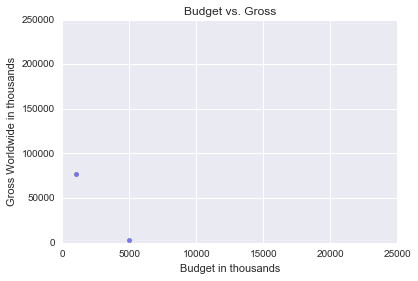

In [411]:


# movie_data.plot(kind='scatter', x='budget',y='worldwide_total_gross')


x = movie_data.budget
y = movie_data.worldwide_total_gross 
title('Budget vs. Gross')
xlabel('Budget in thousands')
ylabel('Gross Worldwide in thousands')
plt.scatter(x,y, alpha = 0.5)
plt.xlim(0,25000)
plt.ylim(0,250000)

plt.show


In [ ]:
movie_data.shape

In [ ]:
movie_data.budget.sort_values(ascending = False).head(5)

In [ ]:
movie_data.sort_values("profit", ascending=False).tail(100)

In [ ]:
movie_data.columns

In [ ]:
movie_data1 = movie_data1.drop(movie_data1.columns[[6,7,8,9,10,11,12,13,14,15]], axis=1)

In [ ]:
c = movie_data1.corr().abs()
s = c.unstack()
so = s.order(kind='quicksort', ascending = False)
so


In [ ]:
import seaborn as sns

In [ ]:

sns.pairplot(movie_data1, size = 1.2, aspect=1.5)

In [ ]:
movie_data.columns

In [ ]:
movie_data1['profit']= (movie_data1.worldwide_total_gross-movie_data1.budget)


In [ ]:
#This has rating in the regression

lsm = smf.ols('profit ~ Drama  + budget + year + length + Animation  + Action + mpaa_x + movie_nps', data = movie_data)
fit1 = lsm.fit()
print(fit1.summary())


